## Load dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
import nltk
%matplotlib inline

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./train.csv')
df.head(5)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [3]:
df['title'][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'

In [4]:
df['text'][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) \nWith apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. \nAs we now know, Comey notified the Republican chairmen and Democratic ranking members of the House Intelligence, Judiciary, and Oversight committees that his agency was reviewing emai

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


## Data Processing

In [6]:
## xoa cot du lieu khong can thiet

df = df.drop(columns=['id', 'title', 'author'], axis=1)

In [7]:
## xoa cac gia tri null

df = df.dropna(axis=0)

In [8]:
len(df)

20761

In [9]:
## xoa cac ki tu dac biet va dau cau

df['clean_news'] = df['text'].str.lower()
df['clean_news']

0        house dem aide: we didn’t even see comey’s let...
1        ever get the feeling your life circles the rou...
2        why the truth might get you fired october 29, ...
3        videos 15 civilians killed in single us airstr...
4        print \nan iranian woman has been sentenced to...
                               ...                        
20795    rapper t. i. unloaded on black celebrities who...
20796    when the green bay packers lost to the washing...
20797    the macy’s of today grew from the union of sev...
20798    nato, russia to hold parallel exercises in bal...
20799      david swanson is an author, activist, journa...
Name: clean_news, Length: 20761, dtype: object

In [10]:
df['clean_news'] = df['clean_news'].str.replace('[^A-Za-z0-9\s]', '')
df['clean_news'] = df['clean_news'].str.replace('\n', '')
df['clean_news'] = df['clean_news'].str.replace('\s', ' ')
print(df['clean_news'])


0        house dem aide: we didn’t even see comey’s let...
1        ever get the feeling your life circles the rou...
2        why the truth might get you fired october 29, ...
3        videos 15 civilians killed in single us airstr...
4        print an iranian woman has been sentenced to s...
                               ...                        
20795    rapper t. i. unloaded on black celebrities who...
20796    when the green bay packers lost to the washing...
20797    the macy’s of today grew from the union of sev...
20798    nato, russia to hold parallel exercises in bal...
20799      david swanson is an author, activist, journa...
Name: clean_news, Length: 20761, dtype: object


In [11]:
## remove stopwords
import nltk
import pandas as pd
from nltk.corpus import stopwords
#nltk.download('stopwords')
stop = stopwords.words('english')
df['clean_news'] = df['clean_news'].apply(lambda x: " ".join([word for word in x.split() if word is not stop]))
df.head()


,text,label,clean_news
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1,house dem aide: we didn’t even see comey’s let...
1,Ever get the feeling your life circles the rou...,0,ever get the feeling your life circles the rou...
2,"Why the Truth Might Get You Fired October 29, ...",1,"why the truth might get you fired october 29, ..."
3,Videos 15 Civilians Killed In Single US Airstr...,1,videos 15 civilians killed in single us airstr...
4,Print \nAn Iranian woman has been sentenced to...,1,print an iranian woman has been sentenced to s...


## Exploratory Data Analyst

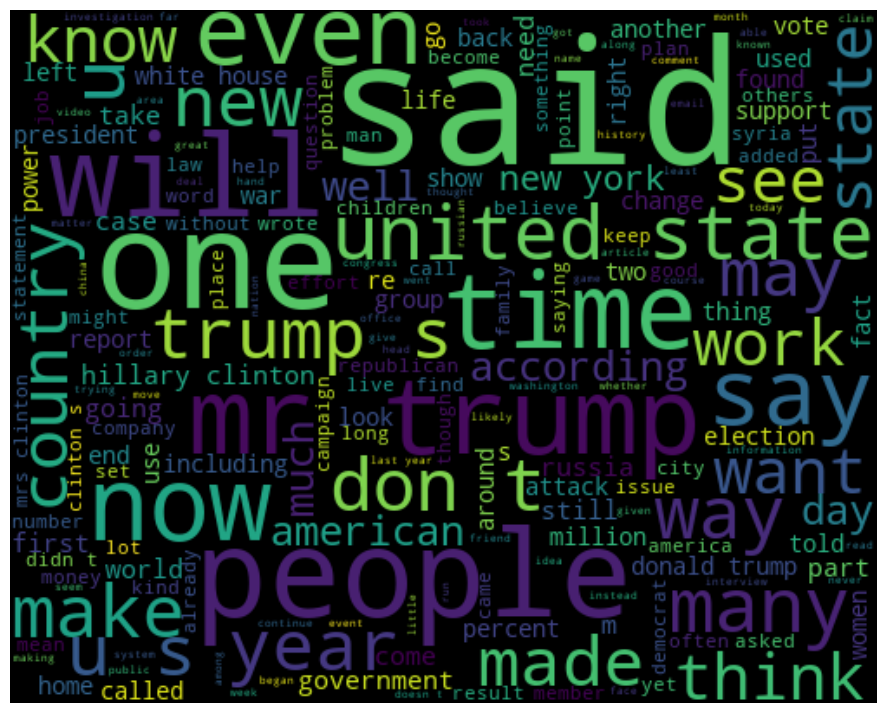

In [12]:
##visualize the frequent word

import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud

all_word = " ".join([sentence for sentence in df['clean_news']])
wordcloud = WordCloud(width=500, height=400, random_state=42, max_font_size=100).generate(all_word)

# ve plot

plt.figure(figsize=(15, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

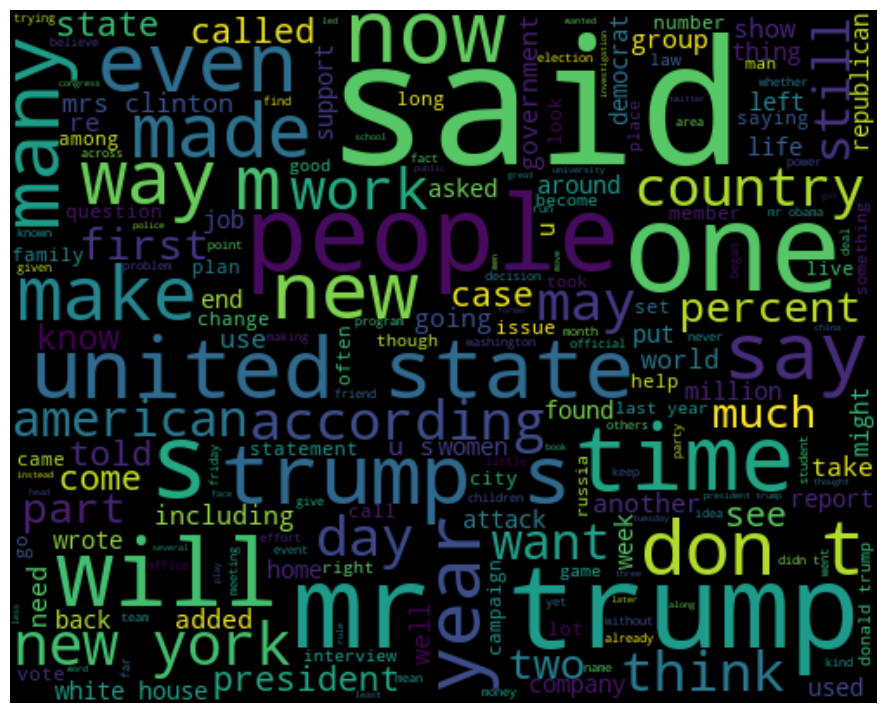

In [35]:
##visualize the frequent word for genuine news
all_word = " ".join([sentence for sentence in df['clean_news'][df['label']==0]])
wordcloud = WordCloud(width=500, height=400, random_state=42, max_font_size=100).generate(all_word)

# ve plot

plt.figure(figsize=(15, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

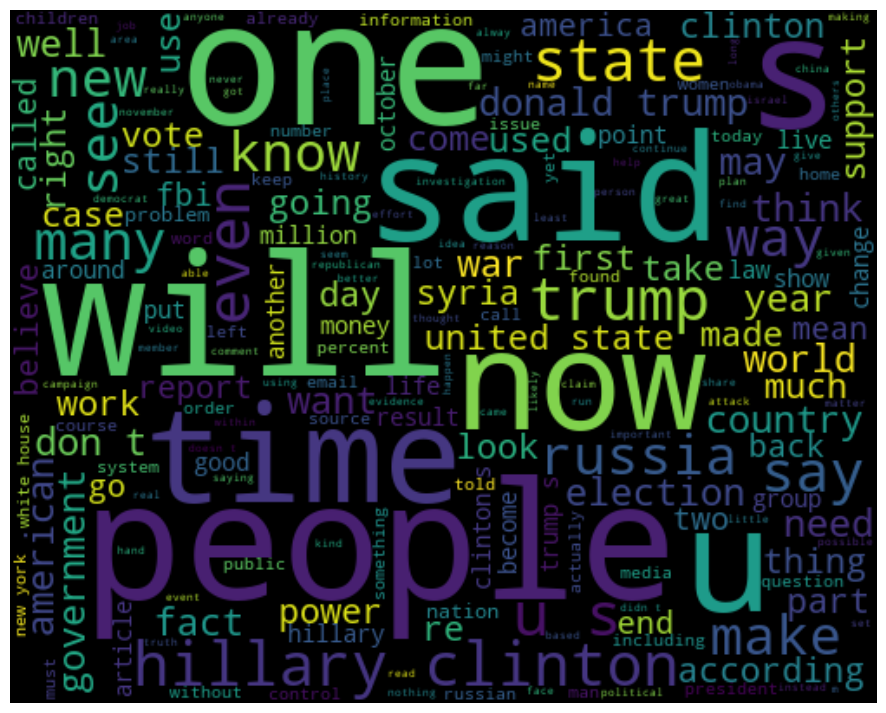

In [13]:
##visualize the frequent word for fake news
all_word = " ".join([sentence for sentence in df['clean_news'][df['label']==1]])
wordcloud = WordCloud(width=500, height=400, random_state=42, max_font_size=100).generate(all_word)

# ve plot

plt.figure(figsize=(15, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Create Word Embeddings: Tao tu nhung

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# tokenize text

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['clean_news'])
word_index = tokenizer.word_index
vocab_size = len(word_index)
vocab_size

In [44]:
# padding data
sequenses = tokenizer.texts_to_sequences(df['clean_news'])
padded_seq = pad_sequences(sequenses, maxlen=600, padding='post', truncating='post')

In [ ]:
sns.countplot(data=df, x='label')